## Notebook to characterise analyses the prediction in the test cohort for Graph model
- characterise saliencies 
- map prediction spatial location 

In [2]:
import os
import sys
import numpy as np
sys.path.append('/home/co-ripa1/rds/hpc-work/scripts/meld_classifier')
import h5py
import matplotlib_surface_plotting as msp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nibabel as nb
import meld_graph.experiment
from meld_classifier.paths import BASE_PATH
from meld_classifier.meld_cohort import MeldCohort,MeldSubject
import ptitprince as pt
import seaborn as sns
import pandas as pd


Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350
Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data


In [3]:
def load_prediction(subject,hdf5,dset='prediction'):
    results={}
    with h5py.File(hdf5, "r") as f:
        for hemi in ['lh','rh']:
            results[hemi] = f[subject][hemi][dset][:]
    return results


In [4]:
from meld_graph.dataset import GraphDataset
from meld_graph.evaluation import Evaluator
import matplotlib as mpl
import matplotlib.cm as cm
from meld_graph.data_preprocessing import Preprocess
from meld_graph.confidence import get_confidence
import matplotlib_surface_plotting as msp
from meld_classifier.meld_plotting import trim
from PIL import Image


In [5]:
dataset = 'test'  # "test" or "H101"

model_graph = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all_newthreshold'

In [7]:
# load experiment
exp = meld_graph.experiment.Experiment.from_folder(model_graph)
exp.data_parameters["augment_data"] = {}

#load trainval dataset
split = "test"

cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )

features = exp.data_parameters["features"]

# get only test patients
with h5py.File(os.path.join(model_graph, 'results_best_model', 'predictions.hdf5'), "r") as f:
    subjects = list(f.keys())

subjects = [subject for subject in subjects if '_FCD_' in subject]
# print(len(subjects))
# subjects = subjects[0:40]



Initialised Experiment 23-10-30_LVHZ_dcp/s_0


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all_newthreshold


### Compute mean saliencies 

In [5]:
# setup parameters
base_feature_sets = [
    ".on_lh.curv.sm3.mgh",
    ".on_lh.pial.K_filtered.sm20.mgh",
    ".on_lh.sulc.sm3.mgh",
    ".on_lh.thickness_regression.sm3.mgh",
    ".on_lh.w-g.pct.sm3.mgh",
    ".on_lh.gm_FLAIR_0.5.sm3.mgh",
    ".on_lh.wm_FLAIR_1.sm3.mgh",
]

feature_names_sets = {
   ".on_lh.gm_FLAIR_0.5.sm3.mgh": "GM FLAIR (50%)",
    ".on_lh.wm_FLAIR_1.sm3.mgh": "WM FLAIR (1mm)",
    ".on_lh.curv.sm3.mgh": "Mean curvature",
    ".on_lh.pial.K_filtered.sm20.mgh" :"Intrinsic Curvature",
    ".on_lh.sulc.sm3.mgh": "Sulcal depth",
    ".on_lh.thickness_regression.sm3.mgh":"Cortical thickness",
    ".on_lh.w-g.pct.sm3.mgh": "Grey-white contrast"}

Initialised Experiment 23-10-30_LVHZ_dcp/s_0


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all_newthreshold


In [ ]:
# create evaluator

dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode="test")
save_prediction_suffix=""


eva = Evaluator(
    experiment=exp,
    checkpoint_path=model_graph,
    make_images=False,
    dataset=dataset,
    save_dir=None,
    cohort=cohort,
    subject_ids=subjects,
    mode="test",
    thresh_and_clust=True,
)

In [8]:
## calculate saliencies if does not exists
#eva.calculate_saliency(save_prediction_suffix="")

calculating saliency
Loading and preprocessing test data


MELD2_H7_3T_FCD_001


Z-scoring data for MELD2_H7_3T_FCD_001
calculating saliency for MELD2_H7_3T_FCD_001, cluster 1.0
/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/captum/attr/_utils/batching.py:45: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 163842 equal to the number of examples.
  warnings.warn(
saving saliencies_1.0 for MELD2_H7_3T_FCD_001
saving mask_salient_1.0 for MELD2_H7_3T_FCD_001
calculating saliency for MELD2_H7_3T_FCD_001, cluster 2.0
saving saliencies_2.0 for MELD2_H7_3T_FCD_001
saving mask_salient_2.0 for MELD2_H7_3T_FCD_001
saving cluster_thresholded_salient for MELD2_H7_3T_FCD_001
Loading and preprocessing test data


MELD2_H7_3T_FCD_004


Z-scoring data for MELD2_H7_3T_FCD_004
calculating saliency for MELD2_H7_3T_FCD_004, cluster 1.0
saving saliencies_1.0 for MELD2_H7_3T_FCD_004
saving mask_salient_1.0 for MELD2_H7_3T_FCD_004
calculating saliency for MELD2_H7_3T_FCD_004, cluster 2.0
saving saliencies_2.0 for MELD2_H7_3T_FCD_004
saving mask_salient_2.0 for MELD2_H7_3T_FCD_004
saving cluster_thresholded_salient for MELD2_H7_3T_FCD_004
Loading and preprocessing test data


MELD2_H7_3T_FCD_005


Z-scoring data for MELD2_H7_3T_FCD_005
calculating saliency for MELD2_H7_3T_FCD_005, cluster 1.0


: 

: 

In [7]:
import pandas as pd 

eva.dropout_suffix = ""
NVERT=293804

df_salient = pd.DataFrame()
values={}
predictions_array=[]
labels_array = []
tp_fp_array = []
fn_array = []
for subject_id in subjects:
    subject = MeldSubject(subject_id, cohort=cohort)
    values['ID'] = subject_id
    values['group'] = True if '_FCD_' in subject_id else False
    values['histology'] = subject.get_demographic_features(["Histology"])[0]
    # initialise parameter for plot
    if subject.has_flair:
        base_features = base_feature_sets
    else:
        base_features = base_feature_sets[0:-2]
    # load predictions and data subject
    data_dictionary = eva.load_data_from_file(subject_id, keys=['result','cluster_thresholded','input_features'], 
                                          split_hemis=True, )
    # print(data_dictionary)
    features_vals = data_dictionary['input_features']
    predictions = data_dictionary['cluster_thresholded']
    
    labels_hemis={}
    dists={}
    list_clust={}
    saliencies={}
     # Loop over hemi
    for i, hemi in enumerate(["left", "right"]):
        list_clust[hemi] = set(predictions[hemi])
        list_clust[hemi].remove(0.0)
        #get borderzone
        hemi_bis = 'lh' if hemi=='left' else 'rh'
        dists[hemi], labels_hemis[hemi] = subject.load_feature_lesion_data(
                    features=['.on_lh.boundary_zone.mgh'], hemi=hemi_bis, features_to_ignore=[]
                )
        if np.sum(dists[hemi])==0:
            dists[hemi] +=200
        borderzones = np.zeros(len(dists[hemi]))
        borderzones[cohort.cortex_mask] = dists[hemi].ravel()[cohort.cortex_mask]<20
        # get saliencies
        keys = [f'saliencies_{cl}' for cl in list_clust[hemi]] + [f'mask_salient_{cl}' for cl in list_clust[hemi]]
        saliencies.update(eva.load_data_from_file(subject_id, 
                                            keys=keys, 
                                            split_hemis=True))
        # initiate params for saliencies
        prefixes = [".combat", ".inter_z.intra_z.combat", ".inter_z.asym.intra_z.combat"]
        labels = ["Harmonised", "Normalised", "Asymmetry"]
        # loop over clusters
        for cluster in list_clust[hemi]:
            values['cluster'] = cluster
            # get prediction
            predictions_array.append(predictions[hemi]==cluster)
            values['cluster_size'] = (predictions[hemi]==cluster).sum()
            # get saliency cluster
            saliencies_cl = saliencies[f'saliencies_{cluster}'][hemi]
            saliencies_cl = saliencies_cl * (NVERT/2)
            # get salient vertices
            mask_salient = saliencies[f'mask_salient_{cluster}'][hemi].astype(bool)
            if ((predictions[hemi]==cluster)&(borderzones.astype(bool))).any():
                values['detected'] = True
                tp_fp_array.append(True)
            else:
                values['detected'] = False
                tp_fp_array.append(False)
            # for each feature
            for pr, prefix in enumerate(prefixes):
                values['preprocessing'] = prefix
                for b, bf in enumerate(base_features):
                    values['feature'] = bf
                    values[f'feature_mean'] = np.mean(
                        np.array(features_vals[hemi][mask_salient, features.index(prefix + bf)])
                    )
                    values[f'feature_err'] = np.std(
                        np.array(features_vals[hemi][mask_salient, features.index(prefix + bf)])
                    )
                    values[f'saliency'] = np.mean(
                        saliencies_cl[mask_salient ,features.index(prefix + bf)]
                        )
                    df_salient = pd.concat([df_salient, pd.DataFrame([values])])
        # for lesion mask
        if labels_hemis[hemi].sum()!=0:
            mask = labels_hemis[hemi].astype(bool)
            labels_array.append(mask)
            values['cluster'] = 'lesion_mask'
            values['cluster_size'] = mask.sum()
            if ((predictions[hemi]==cluster)&(borderzones.astype(bool))).any():
                values['detected'] = True
                fn_array.append(False)
            else:
                values['detected'] = False
                fn_array.append(True)
            # for each feature
            for pr, prefix in enumerate(prefixes):
                values['preprocessing'] = prefix
                for b, bf in enumerate(base_features):
                    values['feature'] = bf
                    values[f'feature_mean'] = np.mean(
                        np.array(features_vals[hemi][mask, features.index(prefix + bf)])
                    )
                    values[f'feature_err'] = np.std(
                        np.array(features_vals[hemi][mask, features.index(prefix + bf)])
                    )
                    values[f'saliency'] = np.nan
                    df_salient = pd.concat([df_salient, pd.DataFrame([values])])
                
df_salient.head()

Loading and preprocessing test data


MELD2_H7_3T_FCD_001


Z-scoring data for MELD2_H7_3T_FCD_001
Loading and preprocessing test data


MELD2_H7_3T_FCD_004


Z-scoring data for MELD2_H7_3T_FCD_004
Loading and preprocessing test data


MELD2_H7_3T_FCD_005


Z-scoring data for MELD2_H7_3T_FCD_005
Loading and preprocessing test data


MELD2_H7_3T_FCD_009


Z-scoring data for MELD2_H7_3T_FCD_009
Loading and preprocessing test data
Z-scoring data for MELD_H10_3T_FCD_0002


MELD_H10_3T_FCD_0002


Loading and preprocessing test data


MELD_H10_3T_FCD_0009


Z-scoring data for MELD_H10_3T_FCD_0009
Loading and preprocessing test data


MELD_H10_3T_FCD_0013


Z-scoring data for MELD_H10_3T_FCD_0013
Loading and preprocessing test data


MELD_H10_3T_FCD_0014


Z-scoring data for MELD_H10_3T_FCD_0014
Loading and preprocessing test data


MELD_H10_3T_FCD_0016


Z-scoring data for MELD_H10_3T_FCD_0016
Loading and preprocessing test data


MELD_H11_3T_FCD_0002


Z-scoring data for MELD_H11_3T_FCD_0002
Loading and preprocessing test data


MELD_H11_3T_FCD_0006


Z-scoring data for MELD_H11_3T_FCD_0006
Loading and preprocessing test data


MELD_H11_3T_FCD_0007


Z-scoring data for MELD_H11_3T_FCD_0007
Loading and preprocessing test data


MELD_H11_3T_FCD_0009


Z-scoring data for MELD_H11_3T_FCD_0009
Loading and preprocessing test data


MELD_H11_3T_FCD_0010


Z-scoring data for MELD_H11_3T_FCD_0010
Loading and preprocessing test data
Z-scoring data for MELD_H11_3T_FCD_0011


MELD_H11_3T_FCD_0011


Loading and preprocessing test data


MELD_H11_3T_FCD_0015


Z-scoring data for MELD_H11_3T_FCD_0015
Loading and preprocessing test data


MELD_H11_3T_FCD_0019


Z-scoring data for MELD_H11_3T_FCD_0019
Loading and preprocessing test data


MELD_H11_3T_FCD_0020


Z-scoring data for MELD_H11_3T_FCD_0020
Loading and preprocessing test data


MELD_H11_3T_FCD_0025


Z-scoring data for MELD_H11_3T_FCD_0025
Loading and preprocessing test data


MELD_H11_3T_FCD_0027


Z-scoring data for MELD_H11_3T_FCD_0027
Loading and preprocessing test data


MELD_H11_3T_FCD_0028


Z-scoring data for MELD_H11_3T_FCD_0028
Loading and preprocessing test data


MELD_H11_3T_FCD_0030


Z-scoring data for MELD_H11_3T_FCD_0030
Loading and preprocessing test data


MELD_H11_3T_FCD_0031


Z-scoring data for MELD_H11_3T_FCD_0031
Loading and preprocessing test data


MELD_H11_3T_FCD_0040


Z-scoring data for MELD_H11_3T_FCD_0040
Loading and preprocessing test data


MELD_H11_3T_FCD_0041


Z-scoring data for MELD_H11_3T_FCD_0041
Loading and preprocessing test data


MELD_H11_3T_FCD_0042


Z-scoring data for MELD_H11_3T_FCD_0042
Loading and preprocessing test data


MELD_H11_3T_FCD_0044


Z-scoring data for MELD_H11_3T_FCD_0044
Loading and preprocessing test data


MELD_H11_3T_FCD_0045


Z-scoring data for MELD_H11_3T_FCD_0045
Loading and preprocessing test data


MELD_H12_3T_FCD_0003


Z-scoring data for MELD_H12_3T_FCD_0003
Loading and preprocessing test data


MELD_H12_3T_FCD_0006


Z-scoring data for MELD_H12_3T_FCD_0006
Loading and preprocessing test data


MELD_H12_3T_FCD_0007


Z-scoring data for MELD_H12_3T_FCD_0007
Loading and preprocessing test data


MELD_H12_3T_FCD_0009


Z-scoring data for MELD_H12_3T_FCD_0009
Loading and preprocessing test data


MELD_H12_3T_FCD_0011


Z-scoring data for MELD_H12_3T_FCD_0011
Loading and preprocessing test data


MELD_H12_3T_FCD_0014


Z-scoring data for MELD_H12_3T_FCD_0014
Loading and preprocessing test data


MELD_H12_3T_FCD_0016


Z-scoring data for MELD_H12_3T_FCD_0016
Loading and preprocessing test data


MELD_H12_3T_FCD_0018


Z-scoring data for MELD_H12_3T_FCD_0018
Loading and preprocessing test data


MELD_H12_3T_FCD_0030


Z-scoring data for MELD_H12_3T_FCD_0030
Loading and preprocessing test data


MELD_H14_3T_FCD_0009


Z-scoring data for MELD_H14_3T_FCD_0009
Loading and preprocessing test data


MELD_H14_3T_FCD_0011


Z-scoring data for MELD_H14_3T_FCD_0011
Loading and preprocessing test data


MELD_H14_3T_FCD_0013


Z-scoring data for MELD_H14_3T_FCD_0013


,ID,group,histology,cluster,cluster_size,detected,preprocessing,feature,feature_mean,feature_err,saliency
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,15216,False,.combat,.on_lh.curv.sm3.mgh,-0.146972,0.930236,-0.084790
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,15216,False,.combat,.on_lh.pial.K_filtered.sm20.mgh,-0.096704,0.818305,0.158997
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,15216,False,.combat,.on_lh.sulc.sm3.mgh,-0.655864,0.916780,0.529781
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,15216,False,.combat,.on_lh.thickness_regression.sm3.mgh,-0.529779,1.028135,-0.177526
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,15216,False,.combat,.on_lh.w-g.pct.sm3.mgh,0.965414,0.851649,0.334767


In [11]:
# save or load dataframes
import pickle

file = os.path.join(model_graph, 'dataframe_saved', 'df_test_saliencies_240815.csv')
file_pkl = os.path.join(model_graph, 'dataframe_saved', 'df_test_tp_fp_prediction_240815.pkl')

# save data
# df_salient.to_csv(file)
# data = {'predictions_array':predictions_array, 
#         'tp_fp_array': tp_fp_array,
#         'fn_array': fn_array, 
#         'labels_array':labels_array
#         }
# with open(file_pkl, 'wb') as f:
#         pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

# load data
df_salient = pd.read_csv(file)
with open(file_pkl, 'rb') as f:
        data = pickle.load(f)
predictions_array = data['predictions_array']
tp_fp_array = data['tp_fp_array']
labels_array = data['labels_array']
fn_array = data['fn_array']

In [16]:
def return_subdataset(sub_df,analysis):
    if analysis=='TP':
        sub_df = sub_df[(sub_df['cluster']!='lesion_mask')&(sub_df['detected']==True)].copy()
    elif analysis=='FP':
        sub_df = sub_df[(sub_df['cluster']!='lesion_mask')&(sub_df['detected']==False)].copy()
    elif analysis=='FN':
        sub_df = sub_df[(sub_df['cluster']=='lesion_mask')&(sub_df['detected']==False)].copy()
    elif analysis=='FCD 1&3':
        sub_df = sub_df[(sub_df['cluster']!='lesion_mask')&((sub_df['histology']=='FCD_1')|(sub_df['histology']=='FCD_3'))].copy()
    elif analysis=='FCD 2A':
        sub_df = sub_df[(sub_df['cluster']!='lesion_mask')&(sub_df['histology']=='FCD_2A')].copy()
    elif analysis=='FCD 2B':
        sub_df = sub_df[(sub_df['cluster']!='lesion_mask')&(sub_df['histology']=='FCD_2B')].copy()
    else:
        sub_df = False
    return sub_df

## plot saliencies

Mean curvature
F(2,348)=5.47, p<0.01
Intrinsic Curvature
F(2,348)=30.54, p<0.01
Sulcal depth
F(2,348)=18.93, p<0.01
Cortical thickness
F(2,348)=41.86, p<0.01
Grey-white contrast
F(2,348)=40.59, p<0.01
GM FLAIR (50%)
F(2,162)=10.15, p<0.01
WM FLAIR (1mm)
F(2,162)=1.47, p=0.23


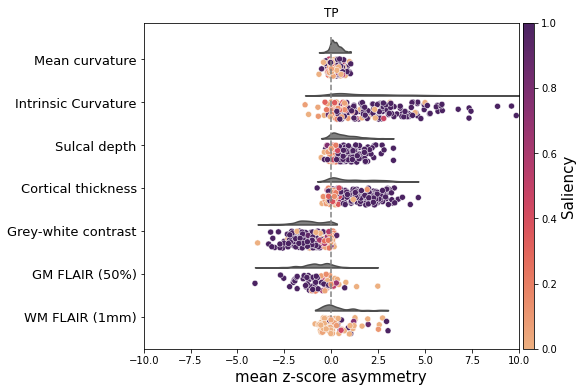

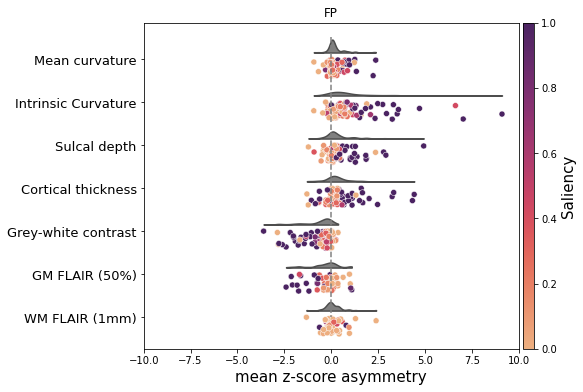

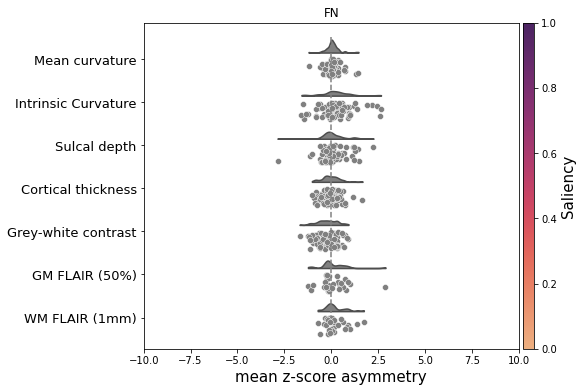

In [21]:
from scipy.stats import f_oneway

analysis = ['TP','FP','FN']
# analysis = ['FCD 1&3', 'FCD 2A', 'FCD 2B']

preprocessing = ".inter_z.asym.intra_z.combat"

sub_dfs = []
for i, group in enumerate(analysis):
    
    # get sub dataset
    sub_df = df_salient[df_salient['preprocessing']==preprocessing]
    sub_df = return_subdataset(sub_df, group) 
    
    # save data for ANOVA test 
    sub_dfs.append(sub_df)
    
    # plot mean z-score features distribution
    f, ax = plt.subplots(figsize=(8, 6))
    ax=pt.half_violinplot( x = "feature_mean"  , y = "feature", order=base_feature_sets, data = sub_df, bw = .2, cut = 0.,
                        scale = "area", color = 'grey', width = .6, inner = None)
    ax.plot([0,0], [-0.5,len(base_feature_sets)-1], '--', color='grey', )
    
    # color saliencies for cluster - lesion mask grey as no saliencies
    cmap = sns.color_palette("flare", as_cmap=True)
    sub_df['y']=[base_feature_sets.index(x)-0.1 for x in sub_df['feature']]
    sub_df['y_jitter']=sub_df['y']+np.random.uniform(low=0.1, high=0.5, size=(len(sub_df['y'])))
    if 'FN' in group:
        scatter=sns.scatterplot(x ="feature_mean"  , y = "y_jitter", data = sub_df, color = 'grey')
    else: 
        scatter=sns.scatterplot(x ="feature_mean"  , y = "y_jitter", data = sub_df, hue="saliency",  hue_norm=(0,1),
                    palette=cmap)
        scatter.legend_.remove()
    
    # plot colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])  
    cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.01)
    cbar.set_label('Saliency', fontsize=15)

    # rename yticks by features
    new_y_ticks = [feature_names_sets[x] for x in base_feature_sets ] 
    ax.set_yticklabels(new_y_ticks, fontsize=13)

    #rename x ticks
    ax.set_xlabel('mean z-score asymmetry', fontsize=15)
    ax.set_ylabel('',)
    if 'FCD' in group:
        ax.set_xlim([-6,6])
    else:
        ax.set_xlim([-10,10])
    ax.set_title(group)
    
for feature in base_feature_sets:
    data = (sub_dfs[0][sub_dfs[0]['feature']==feature]['feature_mean'].values,
            sub_dfs[1][sub_dfs[1]['feature']==feature]['feature_mean'].values,
            sub_dfs[2][sub_dfs[2]['feature']==feature]['feature_mean'].values)
    F, p = f_oneway(data[0], data[1], data[2])
    # compute degree of freedom within and between samples
    df_between = len(data)-1
    df_within = len(data[0])+ len(data[1])+ len(data[2]) - len(data)
    print(feature_names_sets[feature])
    if p<0.01:
        print(f'F({df_between},{df_within})={round(F,2)}, p<0.01')
    else:
        print(f'F({df_between},{df_within})={round(F,2)}, p={round(p,2)}')

plt.title(group)
plt.show()


## plot TP and FP cluster location

In [12]:
def create_surface_plots(surf,prediction,c, base_size=20, vmin=0, vmax=1):
    """plot and reload surface images"""
    tmp_file = 'tmp.png'
    msp.plot_surf(surf['coords'],
              surf['faces'],prediction,
              rotate=[90],
              pvals=np.ones_like(c.cortex_mask),
              cmap='turbo',
              colorbar = True,
              mask = ~c.cortex_mask,
              base_size=base_size,
              vmin=vmin, vmax=vmax,
              filename=tmp_file)
    im = Image.open(tmp_file)
    im = trim(im)
    im = im.convert("RGBA")
    im1 = np.array(im)
    msp.plot_surf(surf['coords'],
            surf['faces'],prediction,
              rotate=[270],
              pvals=np.ones_like(c.cortex_mask),
              cmap='turbo',
              base_size=base_size,
              mask = ~c.cortex_mask,
              vmin=vmin, vmax=vmax,
              filename=tmp_file)
    im = Image.open(tmp_file)
    im = trim(im)
    im = im.convert("RGBA")
    im2 = np.array(im)
    plt.close('all')
    os.remove(tmp_file)
    return im1,im2

In [13]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs1 = GridSpec(3, 2,)

tp_fp_array = np.array(tp_fp_array)
predictions_array = np.array(predictions_array)
fn_array = np.array(fn_array)
labels_array = np.array(labels_array)

# plot TP
predictions_TP = predictions_array[tp_fp_array].astype(int)
predictions_TP = predictions_TP.mean(axis=0)
# predictions_TP[np.isnan(predictions_TP)] = 0

im1, im2 = create_surface_plots(cohort.surf, prediction=predictions_TP, 
                                c=cohort, base_size=10, 
                                vmin=0, vmax=max(predictions_TP),
                                )
ax = fig.add_subplot(gs1[0, 0])
ax.imshow(im1)
ax.axis("off")                
ax = fig.add_subplot(gs1[0, 1])
ax.imshow(im2)
ax.axis("off")
ax.set_title('TP')

#plot FP
predictions_FP = predictions_array[~tp_fp_array].astype(int)
predictions_FP = predictions_FP.mean(axis=0)
# predictions_FP[np.isnan(predictions_FP)] = 0

im1, im2 = create_surface_plots(cohort.surf, prediction=predictions_FP, 
                                c=cohort, base_size=10, 
                                vmin=0, vmax=max(predictions_FP)
                                )
ax = fig.add_subplot(gs1[1, 0])
ax.imshow(im1)
ax.axis("off")                
ax = fig.add_subplot(gs1[1, 1])
ax.imshow(im2)
ax.axis("off")
ax.set_title('FP')

#plot FN
labels_FN = labels_array[fn_array].astype(int)
labels_FN = labels_FN.mean(axis=0)
# labels_FN[np.isnan(labels_FN)] = 0

im1, im2 = create_surface_plots(cohort.surf, prediction=labels_FN, 
                                c=cohort, base_size=10, 
                                vmin=0, vmax=max(labels_FN),
                                )
ax = fig.add_subplot(gs1[2, 0])
ax.imshow(im1)
ax.axis("off")                
ax = fig.add_subplot(gs1[2, 1])
ax.imshow(im2)
ax.axis("off")
ax.set_title('FN') 

fig.savefig(f"tmp.png", facecolor='white')


#todo divide by number of samples 


/tmp/ipykernel_2439625/4070636707.py:60: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(f"tmp.png", facecolor='white')


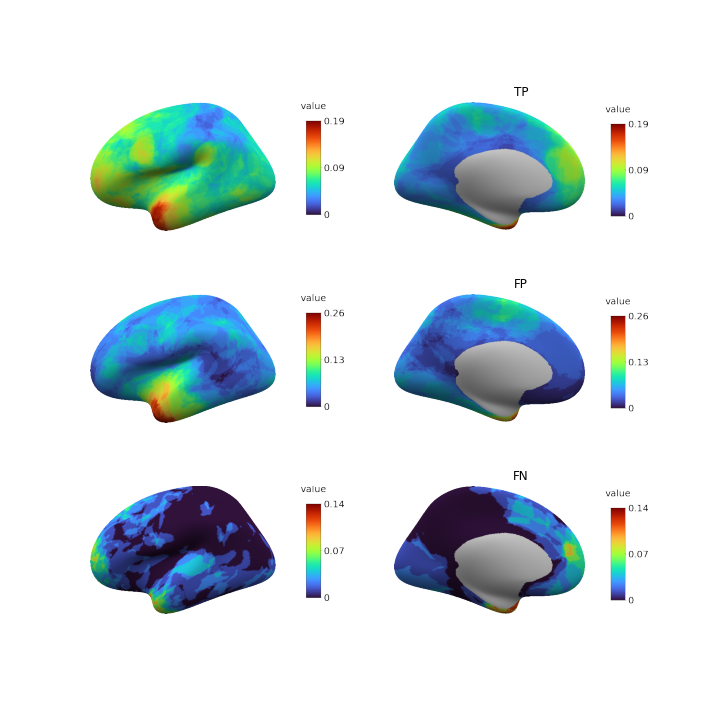

In [14]:
from IPython.display import display
from PIL import Image
display(Image.open("tmp.png"))

## plot distribution cluster size

In [18]:
def return_group_analysis(row):
    if (row['cluster']!='lesion_mask')&(row['detected']==True):
        group_analysis='TP'
    elif (row['cluster']!='lesion_mask')&(row['detected']==False):
        group_analysis='FP'
    elif (row['cluster']=='lesion_mask')&(row['detected']==False):
        group_analysis='FN'
    else:
        group_analysis=np.nan
    return group_analysis

351


/tmp/ipykernel_2439625/3474274405.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['group_analysis'] = sub_df.apply(lambda row: return_group_analysis(row), axis=1)


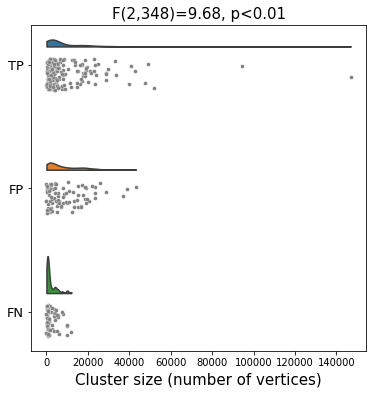

In [21]:
from scipy.stats import f_oneway

preprocessing = ".inter_z.asym.intra_z.combat"
feature = '.on_lh.thickness_regression.sm3.mgh' # just to get one value

sub_dfs = []

analysis = ['TP', 'FP','FN']  
# get sub dataset
sub_df = df_salient[(df_salient['preprocessing']==preprocessing) & (df_salient['feature']==feature) ]
sub_df['group_analysis'] = sub_df.apply(lambda row: return_group_analysis(row), axis=1)

sub_df = sub_df.dropna(subset=['group_analysis'])
print(len(sub_df))
# save data for ANOVA test 
sub_dfs.append(sub_df)

# plot mean z-score features distribution
f, ax = plt.subplots(figsize=(6, 6))
ax=pt.half_violinplot(x = "cluster_size"  , y = "group_analysis", data = sub_df, 
                      order = analysis, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None)
sub_df['y']=[analysis.index(x)-0.1 for x in sub_df['group_analysis']]
sub_df['y_jitter']=sub_df['y']+np.random.uniform(low=0.05, high=0.3, size=(len(sub_df['y'])))
sns.scatterplot(x ="cluster_size"  , y = "y_jitter", data = sub_df, s=15, color='grey')
# rename yticks by features
ax.set_yticklabels(analysis, fontsize=13)
ax.set_xlabel('Cluster size (number of vertices)', fontsize=15)
ax.set_ylabel('')
data = (sub_df[sub_df['group_analysis']=='TP']['cluster_size'].values,
        sub_df[sub_df['group_analysis']=='FP']['cluster_size'].values,
        sub_df[sub_df['group_analysis']=='FN']['cluster_size'].values)
F, p = f_oneway(data[0], data[1], data[2])
# compute degree of freedom within and between samples
df_between = len(data)-1
df_within = len(data[0])+ len(data[1])+ len(data[2]) - len(data)
if p<0.01:
    ax.set_title(f'F({df_between},{df_within})={round(F,2)}, p<0.01', fontsize = 15)
else:
    ax.set_title(f'F({df_between},{df_within})={round(F,2)}, p={round(p,2)}', fontsize = 15)

plt.show()